<a href="https://colab.research.google.com/github/demirhankoc/avrg/blob/main/amazonstock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  1 of 1 completed


<ipython-input-1-ba9adc49b40a>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  amazon_df = amazon_df.append({'ds': dt, 'y': None}, ignore_index=True)
<ipython-input-1-ba9adc49b40a>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  amazon_df = amazon_df.append({'ds': dt, 'y': None}, ignore_index=True)
<ipython-input-1-ba9adc49b40a>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  amazon_df = amazon_df.append({'ds': dt, 'y': None}, ignore_index=True)
<ipython-input-1-ba9adc49b40a>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  amazon_df = amazon_df.append({'ds': dt, 'y': None}, ignore_index=True)
<ipython-input-1-ba9adc49b40a>:22: F

[1.]


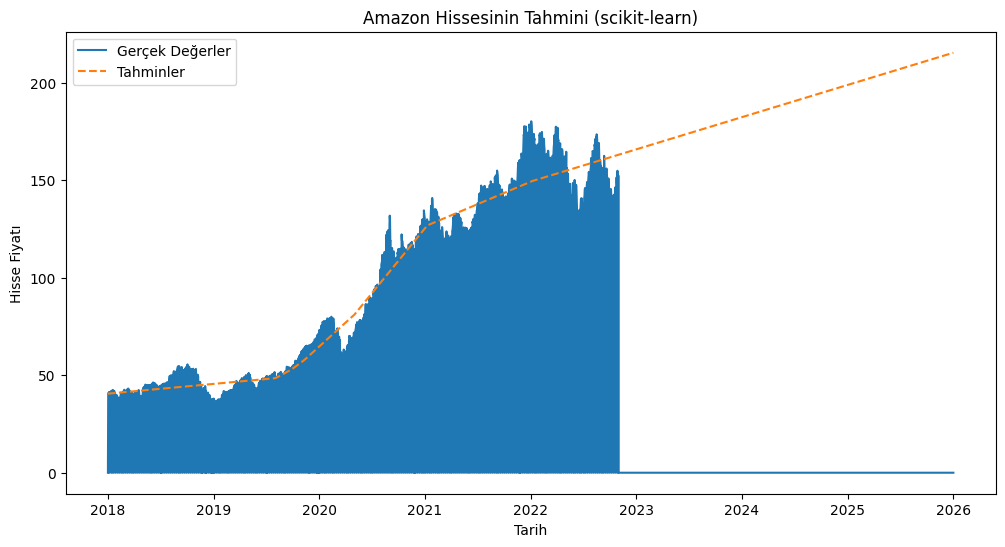

In [1]:
import pandas as pd
import yfinance as yf
from sklearn.svm import SVR
from sklearn import tree
import prophet
import datetime
import matplotlib.pyplot as plt
# MLPRegressor
from sklearn.neural_network import MLPRegressor
import sys


amazon = yf.download('AAPL', start='2018-01-01', end='2022-11-01')
date_range = pd.date_range(start='2018-01-01', end='2026-01-01')

amazon_df = amazon[['Adj Close']].reset_index()
amazon_df = amazon_df.rename(columns={'Date': 'ds', 'Adj Close': 'y'})
amazon_df['ds'] = pd.to_datetime(amazon_df['ds'])

for dt in date_range:
    if dt not in amazon_df['ds'].values:
        amazon_df = amazon_df.append({'ds': dt, 'y': None}, ignore_index=True)
amazon_df = amazon_df.sort_values(by='ds')

amazon_df['ds'] = amazon_df['ds'].values.astype(float)

date_range_df = date_range.values.astype(float)
df_date_range = pd.DataFrame(date_range_df, columns=['ds'])
amazon_df['ds'] = (amazon_df['ds'] - df_date_range['ds'].min()) / (df_date_range['ds'].max() - df_date_range['ds'].min())
df_date_range["ds"] = (df_date_range["ds"] - df_date_range['ds'].min()) / (df_date_range['ds'].max() - df_date_range['ds'].min())

train_data = amazon_df.copy().dropna()
X_train = train_data['ds'].values.reshape(-1, 1)
y_train = train_data['y']

svr_model = MLPRegressor(hidden_layer_sizes=(100, 100, 100), max_iter=1000, activation='relu', solver='adam')
svr_model.fit(X_train, y_train)

y_pred = svr_model.predict(df_date_range["ds"].values.reshape(-1, 1))

amazon_df.fillna(0, inplace=True)
print(max(df_date_range["ds"].values.reshape(-1, 1)))

plt.figure(figsize=(12, 6))
plt.plot(date_range.tolist(), amazon_df["y"], label='Gerçek Değerler')
plt.plot(date_range.tolist(), y_pred, label='Tahminler', linestyle='--')
plt.title('Amazon Hissesinin Tahmini (scikit-learn)')
plt.xlabel('Tarih')
plt.ylabel('Hisse Fiyatı')
plt.legend()

plt.show()
